In [1]:
from phone import Phone
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] # 解决中文标题，坐标轴名，刻度名等问题
plt.rcParams["axes.unicode_minus"]=False

# 读取并观察数据
data = pd.read_table("data/call_receive.txt", sep="\t",header=0, encoding="utf8") # 用python读取txt文件，分隔符为"\t"空格符
print(data.info())
print(data.head(10))
tempt = data["call_number"].astype("str") # 电话号码莫名其妙尾巴带个小数，去掉它
for i in range(len(tempt)):
    tempt[i] = tempt[i].split(".")[0]
data["call_number"] = tempt

"""
Variables:
1 call_number 主叫号码
2 receive_number 被叫号码
3 call_time 呼叫时间
4 receive_time 接听时间
5 hang_time 挂机时间
6 call_duration 通话时长
7 state 线路（接通状况 0表示未接通 1表示已接通）
8 ID_number 工单号
"""

C:\Users\Admin\AppData\Local\Temp\ipykernel_16180\3355491857.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table("data/call_receive.txt", sep="\t",header=0, encoding="utf8") # 用python读取txt文件，分隔符为"\t"空格符


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200029 entries, 0 to 200028
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   call_number     200029 non-null  object
 1   receive_number  200029 non-null  object
 2   call_time       200029 non-null  object
 3   receive_time    200029 non-null  object
 4   hang_time       200029 non-null  int64 
 5   call_duration   200029 non-null  int64 
 6   state           200029 non-null  int64 
 7   ID_number       118611 non-null  object
dtypes: int64(3), object(5)
memory usage: 12.2+ MB
None
     call_number receive_number            call_time         receive_time  \
0  13604413311.0          10021  2022-09-25 13:34:05  2022-09-25 13:36:39   
1  18244083292.0          10021  2022-09-25 13:29:23  2022-09-25 13:30:23   
2  13804309101.0          10021  2022-09-25 13:22:13  2022-09-25 13:24:11   
3  13311310116.0          10021  2022-09-25 13:20:27  2022-09-25 13:24:10   

''

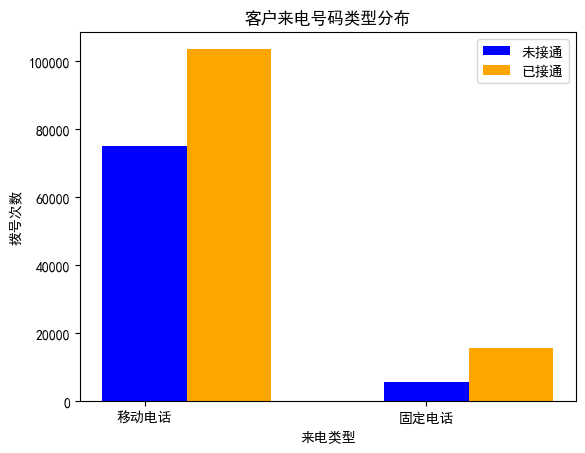

In [2]:
# 客户来电号码类型分布
count_mp_0 = 0; count_mp_1 = 0 # 移动电话未接通数与接通数
count_fp_0 = 0; count_fp_1 = 0 # 固定电话未接通数与接通数
length = len(data["call_number"])
for i in range(length):
    if len(data["call_number"][i])>8 and data["state"][i]==0:
        count_mp_0 = count_mp_0+1
    if len(data["call_number"][i])>8 and data["state"][i]==1:
        count_mp_1 = count_mp_1+1
    if len(data["call_number"][i])<=8 and data["state"][i]==0:
        count_fp_0 = count_fp_0+1
    if len(data["call_number"][i])<=8 and data["state"][i]==1:
        count_fp_1 = count_fp_1+1 

X=np.array([1,2])
Y0 = [count_mp_0, count_fp_0]
Y1 = [count_mp_1, count_fp_1]
plt.bar(X,Y0,color="blue",width=0.3,label="未接通")
plt.bar(X+0.3,Y1,color="orange",width=0.3,label="已接通")
plt.title("客户来电号码类型分布")
plt.xlabel("来电类型")
plt.ylabel("拨号次数")
plt.xticks(X, labels=["移动电话","固定电话"])
plt.legend()
plt.savefig("figure/客户来电号码类型分布.png")
plt.show()

In [ ]:
# 客户来电归属地分布（全国）-- 拟废弃，直接调用数据
Province_0 = {"未知":0}
Province_1 = {"未知":0}

length = len(data["call_number"])
for i in range(length):
    try:
        if Phone().find(data["call_number"][i])==None:
            if data["state"][i]==0:
                Province_0["未知"] = Province_0["未知"]+1
            else:
                Province_1["未知"] = Province_1["未知"]+1
        else:
            province = Phone().find(data["call_number"][i])["province"]
            if data["state"][i]==0:
                Province_0[province] = Province_0.get(province,0)+1
            else:
                Province_1[province] = Province_1.get(province,0)+1
    except Exception: 
        print(0)

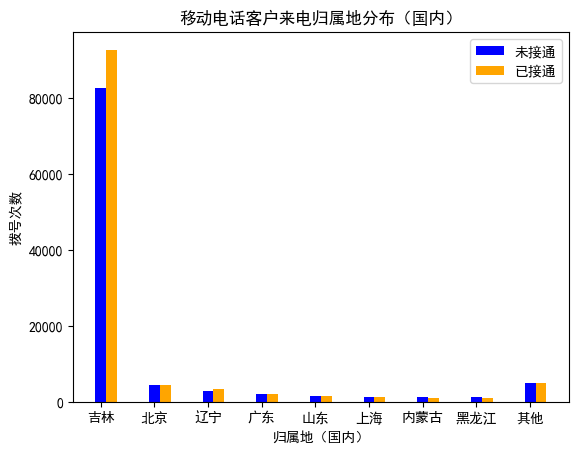

In [6]:
# 移动电话客户来电归属地分布（国内）
# 数据来源：丽丽老师的汇总
X = np.array(range(1,10))
X_label = np.array([ "吉林",  "北京", "辽宁","广东","山东","上海","内蒙古","黑龙江", "其他" ])
Y0 = np.array([41250*2, 2227*2, 1430*2, 947*2, 707*2, 558*2, 640*2, 570*2, 2395*2]) # 未接通数
Y1 = np.array([46306*2, 2186*2, 1720*2, 956*2, 685*2, 611*2, 478*2, 523*2, 2416*2]) # 已接通数

plt.bar(X, Y0, width=0.2, color="blue", label="未接通")
plt.bar(X+0.2, Y1, width=0.2, color="orange", label="已接通")
plt.title("移动电话客户来电归属地分布（国内）")
plt.xlabel("归属地（国内）")
plt.ylabel("拨号次数")
plt.xticks(X, labels=X_label)
plt.legend()
plt.savefig("figure/移动电话客户来电归属地分布（国内）.png")
plt.show()

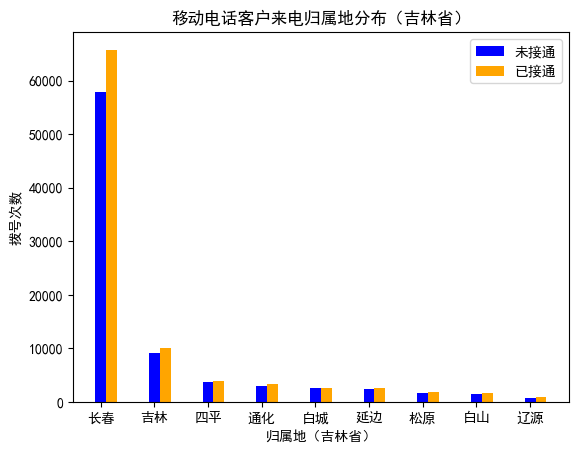

In [7]:
# 移动电话客户来电归属地分布（吉林省）
# 数据来源：丽丽老师的汇总
X = np.array(range(1,10))
X_label = np.array([ "长春",  "吉林", "四平","通化","白城","延边","松原","白山", "辽源" ])
Y0 = np.array([28901*2, 4540*2, 1846*2, 1526*2, 1308*2, 1212*2, 819*2, 702*2, 396*2]) # 未接通数
Y1 = np.array([32854*2, 5052*2, 1978*2, 1637*2, 1258*2, 1337*2, 922*2, 817*2, 451*2]) # 已接通数

plt.bar(X, Y0, width=0.2, color="blue", label="未接通")
plt.bar(X+0.2, Y1, width=0.2, color="orange", label="已接通")
plt.title("移动电话客户来电归属地分布（吉林省）")
plt.xlabel("归属地（吉林省）")
plt.ylabel("拨号次数")
plt.xticks(X, labels=X_label)
plt.legend()
plt.savefig("figure/移动电话客户来电归属地分布（吉林省）.png")
plt.show()

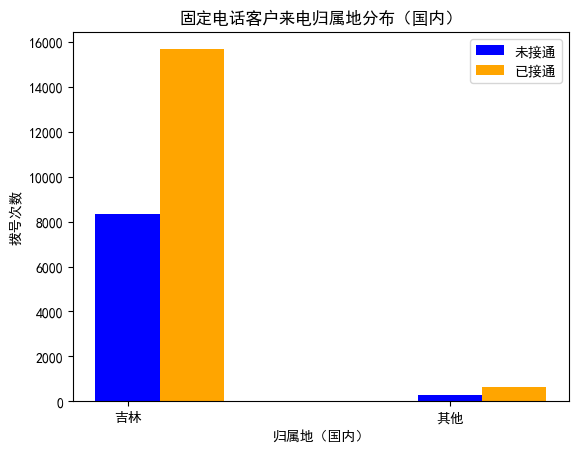

In [12]:
# 固定电话客户来电归属地分布（国内）
# 数据来源：丽丽老师的汇总
X = np.array([1,2])
X_label = np.array([ "吉林",  "其他" ])
Y0 = np.array([int(5544*1.5), int(188*1.5)]) # 未接通数
Y1 = np.array([int(10437*1.5), int(429*1.5)]) # 已接通数

plt.bar(X, Y0, width=0.2, color="blue", label="未接通")
plt.bar(X+0.2, Y1, width=0.2, color="orange", label="已接通")
plt.title("固定电话客户来电归属地分布（国内）")
plt.xlabel("归属地（国内）")
plt.ylabel("拨号次数")
plt.xticks(X, labels=X_label)
plt.legend()
plt.savefig("figure/固定电话客户来电归属地分布（国内）.png")
plt.show()

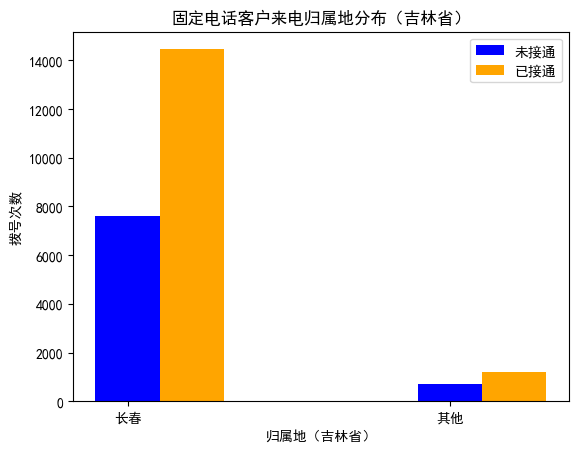

In [15]:
# 固定电话客户来电归属地分布（吉林省）
# 数据来源：丽丽老师的汇总
X = np.array([1,2])
X_label = np.array([ "长春",  "其他"])
Y0 = np.array([int(5079*1.5), int(465*1.5)]) # 未接通数
Y1 = np.array([int(9641*1.5), int(796*1.5)]) # 已接通数

plt.bar(X, Y0, width=0.2, color="blue", label="未接通")
plt.bar(X+0.2, Y1, width=0.2, color="orange", label="已接通")
plt.title("固定电话客户来电归属地分布（吉林省）")
plt.xlabel("归属地（吉林省）")
plt.ylabel("拨号次数")
plt.xticks(X, labels=X_label)
plt.legend()
plt.savefig("figure/固定电话客户来电归属地分布（吉林省）.png")
plt.show()

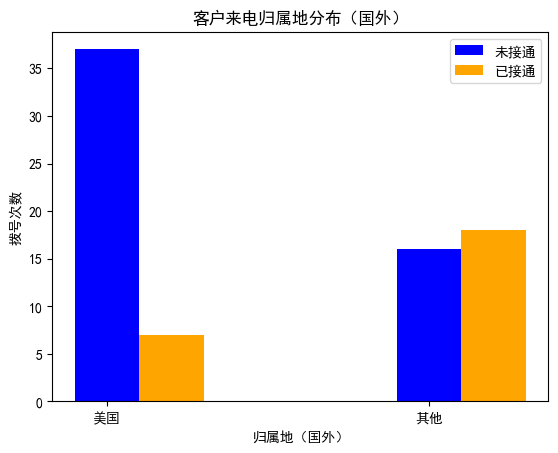

In [16]:
# 客户来电归属地分布（国外）
# 数据来源：丽丽老师的汇总
X = np.array([1,2])
X_label = np.array([ "美国",  "其他"])
Y0 = np.array([int(31*1.2), int(11*1.5)]) # 未接通数
Y1 = np.array([int(6*1.2), int(12*1.5)]) # 已接通数

plt.bar(X, Y0, width=0.2, color="blue", label="未接通")
plt.bar(X+0.2, Y1, width=0.2, color="orange", label="已接通")
plt.title("客户来电归属地分布（国外）")
plt.xlabel("归属地（国外）")
plt.ylabel("拨号次数")
plt.xticks(X, labels=X_label)
plt.legend()
plt.savefig("figure/客户来电归属地分布（国外）.png")
plt.show()

In [2]:
# 移动电话/固定电话用户连续拨打情况（按月累计）

s_call_number = pd.Series(data["call_number"].values, name="call_number")
s_call_time = pd.Series(data["call_time"].values, name="call_time")
s_state = pd.Series(data["state"].values, name="state")
length = len(s_call_number)

# 嵌套字典结构
Count_Mp = {} # 统计每个移动电话用户号码在某年某月的拨打接通情况
Count_Mp_C = {} # 统计每个移动电话用户号码在某年某月的拨打接通情况（长春市）
Count_Fp = {} # 统计每个固定电话用户号码在某年某月的拨打接通情况（固定电话用户只看电话号码是不是8位的，主要都是长春的）


for i in range(length):
    try:
        city = Phone().find(s_call_number[i])["city"]  # 城市查找（没查到就跳过）
    except Exception: 
        None
    if len(s_call_number[i])==11: # 移动电话用户统计
        date = s_call_time[i][0:7]
        if s_call_number[i] in Count_Mp:
            if date in  Count_Mp[s_call_number[i]]:
                Count_Mp[s_call_number[i]][date][s_state[i]] = Count_Mp[s_call_number[i]][date][s_state[i]]+1
            elif s_state[i]==0:
                Count_Mp[s_call_number[i]][date]=np.array([1,0]) 
            elif s_state[i]==1:
                Count_Mp[s_call_number[i]][date]=np.array([0,1])
        else:
            if s_state[i]==0:
                Count_Mp[s_call_number[i]]={date:np.array([1,0])}    
            else:
                Count_Mp[s_call_number[i]]={date:np.array([0,1])}  

    if len(s_call_number[i])==11 and city=="长春": # 长春移动电话用户统计
        date = s_call_time[i][0:7]
        if s_call_number[i] in Count_Mp_C:
            if date in  Count_Mp_C[s_call_number[i]]:
                Count_Mp_C[s_call_number[i]][date][s_state[i]] = Count_Mp_C[s_call_number[i]][date][s_state[i]]+1
            elif s_state[i]==0:
                Count_Mp_C[s_call_number[i]][date]=np.array([1,0])
            elif s_state[i]==1:
                Count_Mp_C[s_call_number[i]][date]=np.array([0,1])
        else:
            if s_state[i]==0:
                Count_Mp_C[s_call_number[i]]={date:np.array([1,0])}    
            else:
                Count_Mp_C[s_call_number[i]]={date:np.array([0,1])}   

    if len(s_call_number[i])==8: # 固定电话用户统计
        date = s_call_time[i][0:7]
        if s_call_number[i] in Count_Fp:
            if date in  Count_Fp[s_call_number[i]]:
                Count_Fp[s_call_number[i]][date][s_state[i]] = Count_Fp[s_call_number[i]][date][s_state[i]]+1
            elif s_state[i]==0:
                Count_Fp[s_call_number[i]][date]=np.array([1,0])
            elif s_state[i]==1:
                Count_Fp[s_call_number[i]][date]=np.array([0,1])
        else:
            if s_state[i]==0:
                Count_Fp[s_call_number[i]]={date:np.array([1,0])}    
            else:
                Count_Fp[s_call_number[i]]={date:np.array([0,1])}   


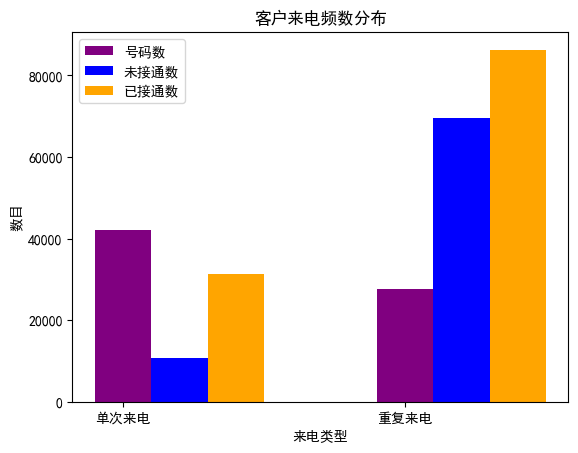

In [30]:
# 客户来电频数分布
s = 0; count_s_0 = 0; count_s_1 = 0 # 单次拨打号码数及拨打频数（已接通和未接通）
m = 0; count_m_0 = 0; count_m_1 = 0 # 多次拨打号码数及拨打频数（已接通和未接通）

for mp in Count_Mp:
    count_0 = 0
    count_1 = 0
    for date in Count_Mp[mp]:
        count_0 = count_0+Count_Mp[mp][date][0]
        count_1 = count_1+Count_Mp[mp][date][1]
    if count_0+count_1==1:
        s = s+1
        count_s_0 = count_s_0+count_0
        count_s_1 = count_s_1+count_1
    else:
        m = m+1
        count_m_0 = count_m_0+count_0
        count_m_1 = count_m_1+count_1


for fp in Count_Fp:
    count_0 = 0
    count_1 = 0
    for date in Count_Fp[fp]:
        count_0 = count_0+Count_Fp[fp][date][0]
        count_1 = count_1+Count_Fp[fp][date][1]
    if count_0+count_1==1:
        s = s+1
        count_s_0 = count_s_0+count_0
        count_s_1 = count_s_1+count_1
    else:
        m = m+1
        count_m_0 = count_m_0+count_0
        count_m_1 = count_m_1+count_1

X = np.array([1,2])
X_label =["单次来电","重复来电"]
Y1 = [s,m ]
Y2 = [count_s_0,count_m_0]
Y3 = [count_s_1,count_m_1]

plt.bar(X, Y1, width=0.2, color="purple", label="号码数")
plt.bar(X+0.2, Y2, width=0.2, color="blue", label="未接通数")
plt.bar(X+0.4, Y3, width=0.2, color="orange", label="已接通数")
plt.title("客户来电频数分布")
plt.xlabel("来电类型")
plt.ylabel("数目")
plt.xticks(X, labels=X_label)
plt.legend()
plt.savefig("figure/客户来电频数分布.png")
plt.show()




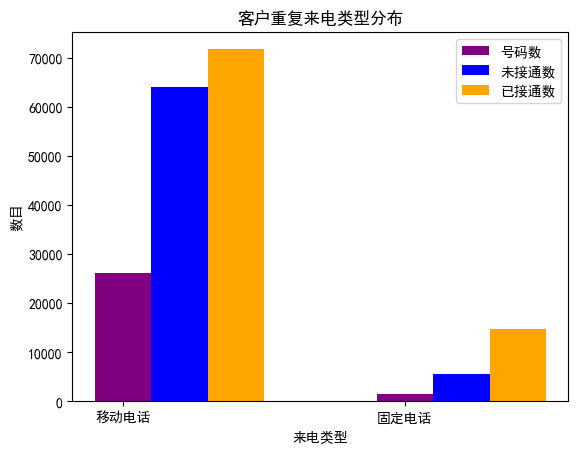

In [3]:
# 客户重复来电类型分布
m = 0; count_m_0 = 0; count_m_1 = 0 # 移动电话多次拨打号码数及拨打频数（已接通和未接通）
f = 0; count_f_0 = 0; count_f_1 = 0 # 固定电话多次拨打号码数及拨打频数（已接通和未接通）

for mp in Count_Mp:
    count_0 = 0
    count_1 = 0
    for date in Count_Mp[mp]:
        count_0 = count_0+Count_Mp[mp][date][0]
        count_1 = count_1+Count_Mp[mp][date][1]
    if count_0+count_1>1:
        m = m+1
        count_m_0 = count_m_0+count_0
        count_m_1 = count_m_1+count_1

for fp in Count_Fp:
    count_0 = 0
    count_1 = 0
    for date in Count_Fp[fp]:
        count_0 = count_0+Count_Fp[fp][date][0]
        count_1 = count_1+Count_Fp[fp][date][1]
    if count_0+count_1>1:
        f = f+1
        count_f_0 = count_f_0+count_0
        count_f_1 = count_f_1+count_1

X = np.array([1,2])
X_label =["移动电话","固定电话"]
Y1 = [m,f ]
Y2 = [count_m_0,count_f_0]
Y3 = [count_m_1,count_f_1]

plt.bar(X, Y1, width=0.2, color="purple", label="号码数")
plt.bar(X+0.2, Y2, width=0.2, color="blue", label="未接通数")
plt.bar(X+0.4, Y3, width=0.2, color="orange", label="已接通数")
plt.title("客户重复来电类型分布")
plt.xlabel("来电类型")
plt.ylabel("数目")
plt.xticks(X, labels=X_label)
plt.legend()
plt.savefig("figure/客户重复来电类型分布.png")
plt.show()

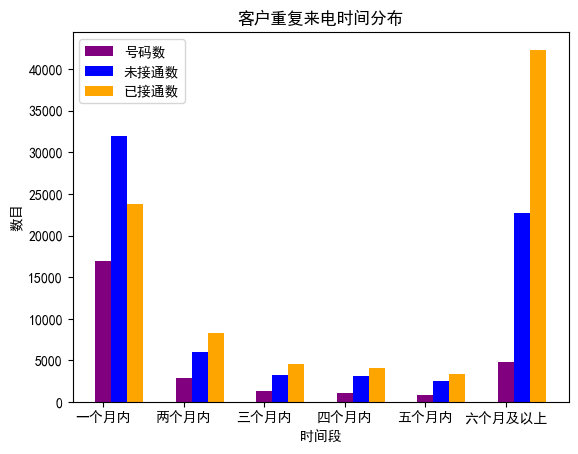

In [16]:
# 客户重复来电时间分布

# 计算列表内最早日期和最晚日期的月份间隔（同一个月内间隔算一个月）
def gap_months(list): 
    # base_time = "2000-01" # 基准时间：2000年1月
    Months = np.array([]) # 存放月份差值
    length = len(list)
    for i in range(length):
        year = int(list[i][0:4])
        month = int(list[i][5:7])
        Months = np.append(Months, year*12+month)
    return max(Months)-min(Months)+1

g1 = 0; count_g1_0 = 0; count_g1_1 = 0 # 一个月内多次拨打号码数及拨打频数（已接通和未接通）
g2 = 0; count_g2_0 = 0; count_g2_1 = 0 # 两个月内多次拨打号码数及拨打频数（已接通和未接通）
g3 = 0; count_g3_0 = 0; count_g3_1 = 0 # 三个月内多次拨打号码数及拨打频数（已接通和未接通）
g4 = 0; count_g4_0 = 0; count_g4_1 = 0 # 四个月内多次拨打号码数及拨打频数（已接通和未接通）
g5 = 0; count_g5_0 = 0; count_g5_1 = 0 # 五个月内多次拨打号码数及拨打频数（已接通和未接通）
g6 = 0; count_g6_0 = 0; count_g6_1 = 0 # 六个月及以上多次拨打号码数及拨打频数（已接通和未接通）

for mp in Count_Mp:
    count_0 = 0
    count_1 = 0
    time = np.array([])
    for date in Count_Mp[mp]:
        time = np.append(time, date)
        count_0 = count_0+Count_Mp[mp][date][0]
        count_1 = count_1+Count_Mp[mp][date][1]
    if count_0+count_1>1:
        if gap_months(time)==1:
            g1 = g1+1
            count_g1_0 = count_g1_0+count_0
            count_g1_1 = count_g1_1+count_1
        elif gap_months(time)==2:
            g2 = g2+1
            count_g2_0 = count_g2_0+count_0
            count_g2_1 = count_g2_1+count_1
        elif gap_months(time)==3:
            g3 = g3+1
            count_g3_0 = count_g3_0+count_0
            count_g3_1 = count_g3_1+count_1
        elif gap_months(time)==4:
            g4 = g4+1
            count_g4_0 = count_g4_0+count_0
            count_g4_1 = count_g4_1+count_1
        elif gap_months(time)==5:
            g5 = g5+1
            count_g5_0 = count_g5_0+count_0
            count_g5_1 = count_g5_1+count_1
        elif gap_months(time)>=6:
            g6 = g6+1
            count_g6_0 = count_g6_0+count_0
            count_g6_1 = count_g6_1+count_1

for fp in Count_Fp:
    count_0 = 0
    count_1 = 0
    time = np.array([])
    for date in Count_Fp[fp]:
        time = np.append(time, date)
        count_0 = count_0+Count_Fp[fp][date][0]
        count_1 = count_1+Count_Fp[fp][date][1]
    if count_0+count_1>1:
        if gap_months(time)==1:
            g1 = g1+1
            count_g1_0 = count_g1_0+count_0
            count_g1_1 = count_g1_1+count_1
        elif gap_months(time)==2:
            g2 = g2+1
            count_g2_0 = count_g2_0+count_0
            count_g2_1 = count_g2_1+count_1
        elif gap_months(time)==3:
            g3 = g3+1
            count_g3_0 = count_g3_0+count_0
            count_g3_1 = count_g3_1+count_1
        elif gap_months(time)==4:
            g4 = g4+1
            count_g4_0 = count_g4_0+count_0
            count_g4_1 = count_g4_1+count_1
        elif gap_months(time)==5:
            g5 = g5+1
            count_g5_0 = count_g5_0+count_0
            count_g5_1 = count_g5_1+count_1
        elif gap_months(time)>=6:
            g6 = g6+1
            count_g6_0 = count_g6_0+count_0
            count_g6_1 = count_g6_1+count_1

X = np.array([1,2,3,4,5,6])
X_label =["一个月内","两个月内","三个月内","四个月内","五个月内","六个月及以上"]
Y1 = [g1,g2,g3,g4,g5,g6]
Y2 = [count_g1_0,count_g2_0,count_g3_0,count_g4_0,count_g5_0,count_g6_0]
Y3 = [count_g1_1,count_g2_1,count_g3_1,count_g4_1,count_g5_1,count_g6_1]

plt.bar(X, Y1, width=0.2, color="purple", label="号码数")
plt.bar(X+0.2, Y2, width=0.2, color="blue", label="未接通数")
plt.bar(X+0.4, Y3, width=0.2, color="orange", label="已接通数")
plt.title("客户重复来电时间分布")
plt.xlabel("时间段")
plt.ylabel("数目")
plt.xticks(X, labels=X_label)
plt.legend()
plt.savefig("figure/客户重复来电时间分布.png")
plt.show()

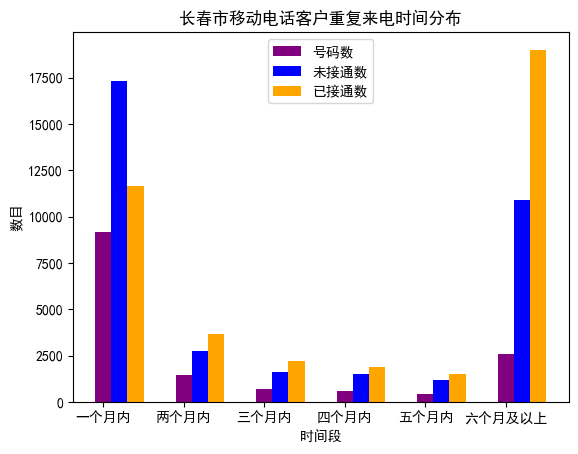

In [17]:
# 长春市移动电话客户重复来电时间分布

# 计算列表内最早日期和最晚日期的月份间隔（同一个月内间隔算一个月）
def gap_months(list): 
    # base_time = "2000-01" # 基准时间：2000年1月
    Months = np.array([]) # 存放月份差值
    length = len(list)
    for i in range(length):
        year = int(list[i][0:4])
        month = int(list[i][5:7])
        Months = np.append(Months, year*12+month)
    return max(Months)-min(Months)+1

g1 = 0; count_g1_0 = 0; count_g1_1 = 0 # 一个月内多次拨打号码数及拨打频数（已接通和未接通）
g2 = 0; count_g2_0 = 0; count_g2_1 = 0 # 两个月内多次拨打号码数及拨打频数（已接通和未接通）
g3 = 0; count_g3_0 = 0; count_g3_1 = 0 # 三个月内多次拨打号码数及拨打频数（已接通和未接通）
g4 = 0; count_g4_0 = 0; count_g4_1 = 0 # 四个月内多次拨打号码数及拨打频数（已接通和未接通）
g5 = 0; count_g5_0 = 0; count_g5_1 = 0 # 五个月内多次拨打号码数及拨打频数（已接通和未接通）
g6 = 0; count_g6_0 = 0; count_g6_1 = 0 # 六个月及以上多次拨打号码数及拨打频数（已接通和未接通）

for mp in Count_Mp_C:
    count_0 = 0
    count_1 = 0
    time = np.array([])
    for date in Count_Mp_C[mp]:
        time = np.append(time, date)
        count_0 = count_0+Count_Mp_C[mp][date][0]
        count_1 = count_1+Count_Mp_C[mp][date][1]
    if count_0+count_1>1:
        if gap_months(time)==1:
            g1 = g1+1
            count_g1_0 = count_g1_0+count_0
            count_g1_1 = count_g1_1+count_1
        elif gap_months(time)==2:
            g2 = g2+1
            count_g2_0 = count_g2_0+count_0
            count_g2_1 = count_g2_1+count_1
        elif gap_months(time)==3:
            g3 = g3+1
            count_g3_0 = count_g3_0+count_0
            count_g3_1 = count_g3_1+count_1
        elif gap_months(time)==4:
            g4 = g4+1
            count_g4_0 = count_g4_0+count_0
            count_g4_1 = count_g4_1+count_1
        elif gap_months(time)==5:
            g5 = g5+1
            count_g5_0 = count_g5_0+count_0
            count_g5_1 = count_g5_1+count_1
        elif gap_months(time)>=6:
            g6 = g6+1
            count_g6_0 = count_g6_0+count_0
            count_g6_1 = count_g6_1+count_1

X = np.array([1,2,3,4,5,6])
X_label =["一个月内","两个月内","三个月内","四个月内","五个月内","六个月及以上"]
Y1 = [g1,g2,g3,g4,g5,g6]
Y2 = [count_g1_0,count_g2_0,count_g3_0,count_g4_0,count_g5_0,count_g6_0]
Y3 = [count_g1_1,count_g2_1,count_g3_1,count_g4_1,count_g5_1,count_g6_1]

plt.bar(X, Y1, width=0.2, color="purple", label="号码数")
plt.bar(X+0.2, Y2, width=0.2, color="blue", label="未接通数")
plt.bar(X+0.4, Y3, width=0.2, color="orange", label="已接通数")
plt.title("长春市移动电话客户重复来电时间分布")
plt.xlabel("时间段")
plt.ylabel("数目")
plt.xticks(X, labels=X_label)
plt.legend()
plt.savefig("figure/长春市移动电话客户重复来电时间分布.png")
plt.show()

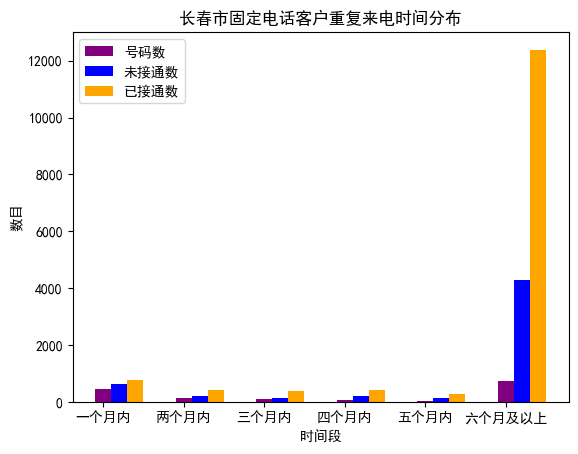

In [18]:
# 长春市固定电话客户重复来电分布

# 计算列表内最早日期和最晚日期的月份间隔（同一个月内间隔算一个月）
def gap_months(list): 
    # base_time = "2000-01" # 基准时间：2000年1月
    Months = np.array([]) # 存放月份差值
    length = len(list)
    for i in range(length):
        year = int(list[i][0:4])
        month = int(list[i][5:7])
        Months = np.append(Months, year*12+month)
    return max(Months)-min(Months)+1

g1 = 0; count_g1_0 = 0; count_g1_1 = 0 # 一个月内多次拨打号码数及拨打频数（已接通和未接通）
g2 = 0; count_g2_0 = 0; count_g2_1 = 0 # 两个月内多次拨打号码数及拨打频数（已接通和未接通）
g3 = 0; count_g3_0 = 0; count_g3_1 = 0 # 三个月内多次拨打号码数及拨打频数（已接通和未接通）
g4 = 0; count_g4_0 = 0; count_g4_1 = 0 # 四个月内多次拨打号码数及拨打频数（已接通和未接通）
g5 = 0; count_g5_0 = 0; count_g5_1 = 0 # 五个月内多次拨打号码数及拨打频数（已接通和未接通）
g6 = 0; count_g6_0 = 0; count_g6_1 = 0 # 六个月及以上多次拨打号码数及拨打频数（已接通和未接通）

for fp in Count_Fp:
    count_0 = 0
    count_1 = 0
    time = np.array([])
    for date in Count_Fp[fp]:
        time = np.append(time, date)
        count_0 = count_0+Count_Fp[fp][date][0]
        count_1 = count_1+Count_Fp[fp][date][1]
    if count_0+count_1>1:
        if gap_months(time)==1:
            g1 = g1+1
            count_g1_0 = count_g1_0+count_0
            count_g1_1 = count_g1_1+count_1
        elif gap_months(time)==2:
            g2 = g2+1
            count_g2_0 = count_g2_0+count_0
            count_g2_1 = count_g2_1+count_1
        elif gap_months(time)==3:
            g3 = g3+1
            count_g3_0 = count_g3_0+count_0
            count_g3_1 = count_g3_1+count_1
        elif gap_months(time)==4:
            g4 = g4+1
            count_g4_0 = count_g4_0+count_0
            count_g4_1 = count_g4_1+count_1
        elif gap_months(time)==5:
            g5 = g5+1
            count_g5_0 = count_g5_0+count_0
            count_g5_1 = count_g5_1+count_1
        elif gap_months(time)>=6:
            g6 = g6+1
            count_g6_0 = count_g6_0+count_0
            count_g6_1 = count_g6_1+count_1

X = np.array([1,2,3,4,5,6])
X_label =["一个月内","两个月内","三个月内","四个月内","五个月内","六个月及以上"]
Y1 = [g1,g2,g3,g4,g5,g6]
Y2 = [count_g1_0,count_g2_0,count_g3_0,count_g4_0,count_g5_0,count_g6_0]
Y3 = [count_g1_1,count_g2_1,count_g3_1,count_g4_1,count_g5_1,count_g6_1]

plt.bar(X, Y1, width=0.2, color="purple", label="号码数")
plt.bar(X+0.2, Y2, width=0.2, color="blue", label="未接通数")
plt.bar(X+0.4, Y3, width=0.2, color="orange", label="已接通数")
plt.title("长春市固定电话客户重复来电时间分布")
plt.xlabel("时间段")
plt.ylabel("数目")
plt.xticks(X, labels=X_label)
plt.legend()
plt.savefig("figure/长春市固定电话客户重复来电时间分布.png")
plt.show()

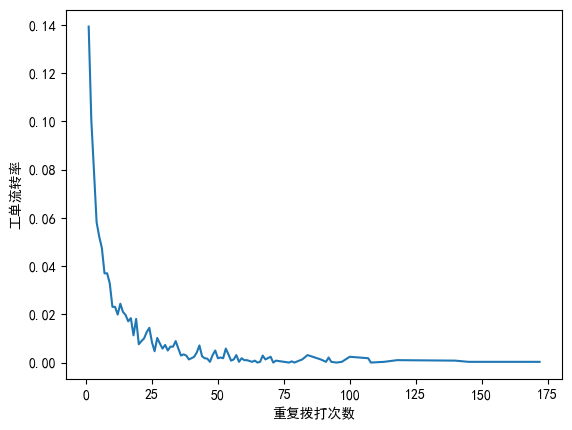

In [36]:
# 重复拨打频次和工单流转率
# 数据来源：丽丽老师的汇总

data1 = pd.read_csv("data/repeat and rate.csv",header=0, encoding="utf8")

X = data1["repeat"].values # 重复拨打次数
Y = data1["rate"].values # 工单流转率

plt.plot(X, Y)
plt.xlabel("重复拨打次数")
plt.ylabel("工单流转率")
plt.savefig("figure/重复拨打次数和工单流转率关系.png")
plt.show()

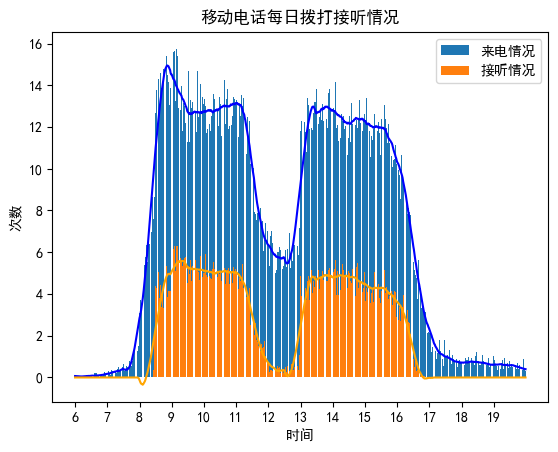

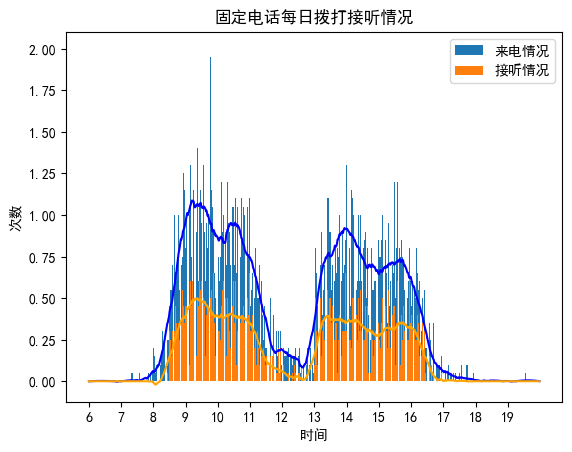

In [100]:
# 客户号码分时段分渠道接入情况
"""
考虑到给定的数据集里面不包含人工接听时间（只统计了语音助手的接听时间）故采用旧数据集近似表示，由于反映的是平均一天内的情况，故该近似处理在当旧数据集较大时是可行的。
"""
from cmath import nan
import datetime # 日期模块
from scipy.signal import savgol_filter # 数据平滑器
import matplotlib.pyplot as plt
data=pd.read_csv("data/通话记录.csv", header=0, low_memory=False)
data=data[pd.isnull(data["queueId"])==False] # 数据筛选[只考虑人工渠道]

s_call_number = pd.Series(data["call_number"].astype("str").values, name="call_number")
s_call_time = pd.Series(data["call_time"].astype("str").values, name="call_time") 
s_answer_time =  pd.Series(data["answer_time"].astype("str").values, name="answer_time") 

# 考察每时刻（精确到分钟）移动电话平均呼叫接听情况（不考虑周末和下班时间）
call_times_m={}; answer_times_m={} # 移动电话每时科呼叫次数和接听次数
call_times_f={}; answer_times_f={} # 固定电话每时科呼叫次数和接听次数

length=s_call_number.shape[0]
for i in range(length):
    if len(s_call_number[i])-2>8: # 移动电话
        # call_time
        date = s_call_time[i].split(" ")[0] # 日期与时间
        time = s_call_time[i].split(" ")[1] 
        day = date.split("/")[0]
        call_hour = time.split(":")[0]; call_minute = time.split(":")[1] # 时，分（来电） 

        if (int(day) not in [6,7,13,14,20,21]) and (int(call_hour) in np.arange(6,19+1)): # 如果不属于周末以及下班时间内

            # 考虑来电情况
            if call_hour in call_times_m: 
                call_times_m[call_hour][call_minute]=call_times_m[call_hour].get(call_minute,0)+1
            else:
                call_times_m[call_hour]={call_minute:1}
            
            if s_answer_time[i]!="nan": # 进一步，如果电话接通，考虑接听情况
                # answer_time
                time = s_answer_time[i].split(" ")[1]
                answer_hour = time.split(":")[0]; answer_minute = time.split(":")[1] # 时，分（接听）
                if answer_hour in answer_times_m:
                    answer_times_m[answer_hour][answer_minute]=answer_times_m[answer_hour].get(answer_minute,0)+1
                else:
                    answer_times_m[answer_hour]={answer_minute:1}

    else: # 固定电话
        # answer_time
        date = s_call_time[i].split(" ")[0] # 日期与时间
        time = s_call_time[i].split(" ")[1] 
        day = date.split("/")[0]
        call_hour = time.split(":")[0]; call_minute = time.split(":")[1] # 时，分（来电）

        if (int(day) not in [6,7,13,14,20,21]) and (int(call_hour) in np.arange(6,19+1)): # 如果不属于周末以及下班时间内

            # 考虑来电情况
            if call_hour in call_times_f: 
                call_times_f[call_hour][call_minute]=call_times_f[call_hour].get(call_minute,0)+1
            else:
                call_times_f[call_hour]={call_minute:1}
            
            if s_answer_time[i]!="nan": # 进一步，如果电话接通，考虑接听情况
                # answer_time
                time = s_answer_time[i].split(" ")[1]
                answer_hour = time.split(":")[0]; answer_minute = time.split(":")[1] # 时，分（接听）
                if answer_hour in answer_times_f:
                    answer_times_f[answer_hour][answer_minute]=answer_times_f[answer_hour].get(answer_minute,0)+1
                else:
                    answer_times_f[answer_hour]={answer_minute:1}

# 移动电话
call_times=np.array([]); answer_times=np.array([]); # 根据call_times_m和answer_times_m的数据，来统计平均每个工作日每时刻（6-19）呼叫接听次数
for hour in range(6,19+1):
    hour=("0"+str(hour))[-2:]
    for minute in range(0,59+1):
        minute=("0"+str(minute))[-2:]
        if hour in call_times_m:
            call_times=np.append(call_times, call_times_m[hour].get(minute,0)/20)
        else:
            call_times=np.append(call_times,0)
        if hour in answer_times_m:
            answer_times=np.append(answer_times, answer_times_m[hour].get(minute,0)/20)
        else:
            answer_times=np.append(answer_times,0)


call_times_filter=savgol_filter(call_times,59,3,mode="nearest") # 对原数据作平滑处理
answer_times_filter=savgol_filter(answer_times,59,3,mode="nearest")

X=np.arange(1,840+1)
plt.bar(X,call_times,label ="来电情况")
plt.bar(X,answer_times,label ="接听情况")
plt.plot(X,call_times_filter,color="blue")
plt.plot(X,answer_times_filter,color="orange")
plt.title("移动电话每日拨打接听情况")
plt.xlabel("时间")
plt.xticks(range(1,840+1,60),labels=[6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.ylabel("次数")
plt.legend(loc="upper right") 
plt.savefig("figure/移动电话每日拨打接听情况.png")
plt.show()

# 固定电话
call_times=np.array([]); answer_times=np.array([]); # 根据call_times_f和answer_times_f的数据，来统计平均每个工作日每时刻（6-19）呼叫接听次数
for hour in range(6,19+1):
    hour=("0"+str(hour))[-2:]
    for minute in range(0,59+1):
        minute=("0"+str(minute))[-2:]
        if hour in call_times_m:
            call_times=np.append(call_times, call_times_f[hour].get(minute,0)/20)
        else:
            call_times=np.append(call_times,0)
        if hour in answer_times_m:
            answer_times=np.append(answer_times, answer_times_f[hour].get(minute,0)/20)
        else:
            answer_times=np.append(answer_times,0)


call_times_filter=savgol_filter(call_times,59,3,mode="nearest") # 对原数据作平滑处理
answer_times_filter=savgol_filter(answer_times,59,3,mode="nearest")

X=np.arange(1,840+1)
plt.bar(X,call_times,label ="来电情况")
plt.bar(X,answer_times,label ="接听情况")
plt.plot(X,call_times_filter,color="blue")
plt.plot(X,answer_times_filter,color="orange")
plt.title("固定电话每日拨打接听情况")
plt.xlabel("时间")
plt.xticks(range(1,840+1,60),labels=[6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.ylabel("次数")
plt.legend(loc="upper right") 
plt.savefig("figure/固定电话每日拨打接听情况.png")
plt.show()
